In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
def add_more_info(df):
    df['nodes'] = (df['g1_nodes'] + df['g2_nodes']) / 2
    df['edges'] = (df['g1_edges'] + df['g2_edges']) / 2
    df['nodes^2'] = df['g1_nodes'] * df['g2_nodes']
    df['edges^2'] = df['g1_edges'] * df['g2_edges']
    df['nodes_X_edges'] = (df['g1_nodes'] * df['g1_edges'] + df['g2_nodes'] * df['g2_edges']) / 2
    df['log_nodes_X_edges'] = np.log(df['nodes_X_edges'])
    df['uncommon_nodes'] = df['nodes'] - df['generalization_nodes']
    df['log_uncommon_nodes'] = np.log(df['uncommon_nodes'])
    df['log_avg_time'] = np.log(df['avg_time'])
    df['log_nodes'] = np.log(df['nodes'])
    df['log_nodes^2'] = np.log(df['nodes^2'])
    df['uncommon_edges'] = df['edges'] - df['generalization_edges']
    df['log_uncommon_edges'] = np.log(df['uncommon_edges'])
    df['uncommon_nodes_X_uncommon_edges'] = df['uncommon_nodes'] * df['uncommon_edges']
    df['log_uncommon_nodes_X_uncommon_edges'] = np.log(df['uncommon_nodes_X_uncommon_edges'])
    df['common_nodes_X_common_edges'] = df['generalization_nodes'] * df['generalization_edges']
    df['log_common_nodes_X_common_edges'] = np.log(df['common_nodes_X_common_edges'])

In [3]:
def linear_regression_of(df, x_column, y_column, x_label=None, y_label=None, title=None):
    X = df[x_column].values.reshape(-1, 1)
    Y = df[y_column].values.reshape(-1, 1)
    linear_regressor = LinearRegression()
    linear_regressor.fit(X, Y)
    Y_pred = linear_regressor.predict(X)
    r_squared = r2_score(Y, Y_pred)

    plt.scatter(X, Y, s=5)
    plt.plot(X, Y_pred, color='red')
    if x_label is None:
        x_label = x_column
    plt.xlabel(x_label)
    if y_label is None:
        y_label = y_column
    plt.ylabel(y_label)
    if title is None:
        title = 'Linear Regression'
    plt.title(title)
    plt.show()

    return linear_regressor.coef_, linear_regressor.intercept_, r_squared

In [4]:
df = pd.read_csv("AggregatedData.csv")
df_with = pd.read_csv("AggregatedDataWithDependencies.csv")
df_without = pd.read_csv("AggregatedDataWithoutDependencies.csv")
add_more_info(df)
add_more_info(df_with)
add_more_info(df_without)
df.head()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = geta

,name,generalization_nodes,generalization_edges,generalization_node_variables,generalization_edge_variables,g1_nodes,g1_edges,g2_nodes,g2_edges,time0,...,log_uncommon_nodes,log_avg_time,log_nodes,log_nodes^2,uncommon_edges,log_uncommon_edges,uncommon_nodes_X_uncommon_edges,log_uncommon_nodes_X_uncommon_edges,common_nodes_X_common_edges,log_common_nodes_X_common_edges
0,1.0.11-all.txtvs1.0.11.txt,1266,813,0,1373,1266,2205,1266,813,80,...,-inf,4.411585,7.143618,14.287235,696.0,6.545350,0.0,-inf,1029258,13.844349
1,1.0.11-all.txtvs2.0.0-all.txt,1253,2103,23,248,1266,2205,1294,2311,74,...,3.295837,4.324133,7.154615,14.309111,155.0,5.043425,4185.0,8.339262,2635059,14.784416
2,1.0.11-all.txtvs2.0.0.txt,1253,773,23,1448,1266,2205,1294,822,83,...,3.295837,4.432007,7.154615,14.309111,740.5,6.607326,19993.5,9.903162,968569,13.783575
3,1.0.11-all.txtvs2.10.0-all.txt,1239,2047,56,411,1266,2205,1382,2504,94,...,4.442651,4.551769,7.188413,14.374905,307.5,5.728475,26137.5,10.171126,2536233,14.746190
4,1.0.11-all.txtvs2.10.0.txt,1239,748,44,1512,1266,2205,1382,919,103,...,4.442651,4.612146,7.188413,14.374905,814.0,6.701960,69190.0,11.144612,926772,13.739463


In [5]:
df.describe()

,generalization_nodes,generalization_edges,generalization_node_variables,generalization_edge_variables,g1_nodes,g1_edges,g2_nodes,g2_edges,time0,time1,...,uncommon_nodes,log_uncommon_nodes,log_avg_time,log_nodes,uncommon_edges,log_uncommon_edges,uncommon_nodes_X_uncommon_edges,log_uncommon_nodes_X_uncommon_edges,common_nodes_X_common_edges,log_common_nodes_X_common_edges
count,4753.000000,4753.000000,4753.000000,4753.000000,4753.000000,4753.000000,4753.000000,4753.000000,4753.000000,4753.000000,...,4753.000000,4753.000000,4753.000000,4753.000000,4753.000000,4753.000000,4.753000e+03,4753.000000,4.753000e+03,4753.000000
mean,807.053440,709.858616,47.146644,841.620029,1165.047339,1681.187040,1167.401641,1577.241532,246.407111,245.406480,...,718.342100,-inf,5.054475,7.736644,1838.711340,7.098168,1.664273e+06,-inf,6.654272e+05,12.985497
std,279.911502,613.699496,22.246793,680.193744,311.349951,1096.049424,311.254689,1158.014266,240.756724,240.305066,...,508.806718,NaN,1.070884,0.191302,1253.282005,1.174578,1.788143e+06,NaN,8.943703e+05,0.845049
min,254.000000,58.000000,0.000000,2.000000,828.000000,557.000000,828.000000,557.000000,17.000000,17.000000,...,0.000000,-inf,2.879198,7.412160,2.000000,0.693147,0.000000e+00,-inf,1.473200e+04,9.597777
25%,639.000000,355.000000,31.000000,250.000000,863.000000,896.000000,871.000000,614.000000,64.000000,62.000000,...,160.000000,5.075174,4.151040,7.561122,792.000000,6.674561,1.438200e+05,11.876318,2.369880e+05,12.375765
50%,724.000000,517.000000,51.000000,844.000000,1050.000000,1568.000000,1050.000000,940.000000,155.000000,153.000000,...,944.000000,6.850126,5.072671,7.775276,1688.000000,7.431300,9.365220e+05,13.749928,4.022260e+05,12.904769
75%,827.000000,868.000000,63.000000,1080.000000,1521.000000,2205.000000,1521.000000,1764.000000,324.000000,323.000000,...,1057.000000,6.963190,5.823342,7.816417,2959.000000,7.992607,2.712523e+06,14.813390,7.409110e+05,13.515636
max,1580.000000,3842.000000,127.000000,3019.000000,1580.000000,3917.000000,1580.000000,3917.000000,1551.000000,1512.000000,...,1972.000000,7.586804,7.360740,8.058327,5102.000000,8.537388,1.006114e+07,16.124191,6.024256e+06,15.611305


In [5]:
times_names = [f'time{i}' for i in range(10)]
times_names.append('avg_time')
df.sum()[times_names] / 60_000

time0        19.51955
time1       19.440283
time2       19.541217
time3       20.921967
time4       21.033433
time5          21.141
time6       21.831067
time7        21.63935
time8       21.764733
time9       21.723017
avg_time    20.855562
dtype: object

In [8]:
quantile = df['avg_time'].quantile(0.99)
plt_df = df[df['avg_time'] < quantile]

<Axes: xlabel='nodes', ylabel='time (ms)'>

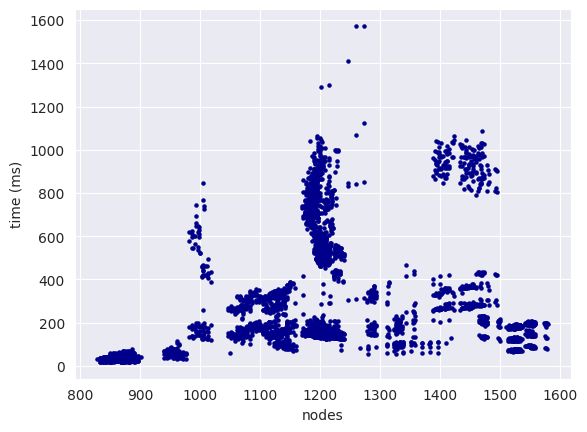

In [9]:
df.plot.scatter(x='nodes', y='avg_time', c='DarkBlue', s=5, ylabel='time (ms)', xlabel='nodes')

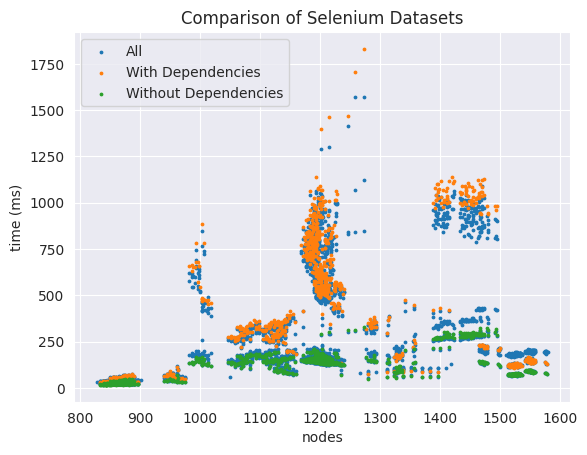

In [11]:
# Create a scatter plot for all metrics
plt.scatter(df['nodes'], df['avg_time'], label='All', s=3)
plt.scatter(df_with['nodes'], df_with['avg_time'], label='With Dependencies', s=3)
plt.scatter(df_without['nodes'], df_without['avg_time'], label='Without Dependencies', s=3)

# Customize the plot
plt.xlabel('nodes')
plt.ylabel('time (ms)')
plt.title('Comparison of Selenium Datasets')
plt.legend()

# Display the plot
plt.show()

<Axes: xlabel='edges', ylabel='time (ms)'>

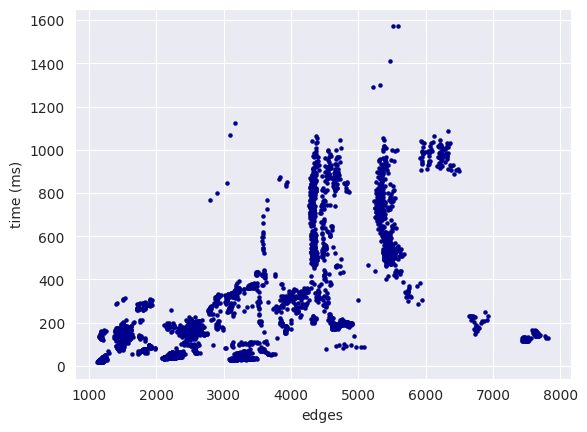

In [36]:
df.plot.scatter(x='edges', y='avg_time', c='DarkBlue', s=5, ylabel='time (ms)', xlabel='edges')

<Axes: xlabel='uncommon nodes', ylabel='time (ms)'>

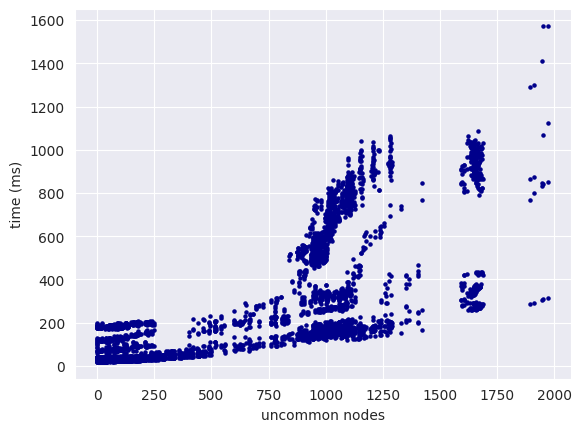

In [42]:
df.plot.scatter(x='uncommon_nodes', y='avg_time', c='DarkBlue', s=5, ylabel='time (ms)', xlabel='uncommon nodes')

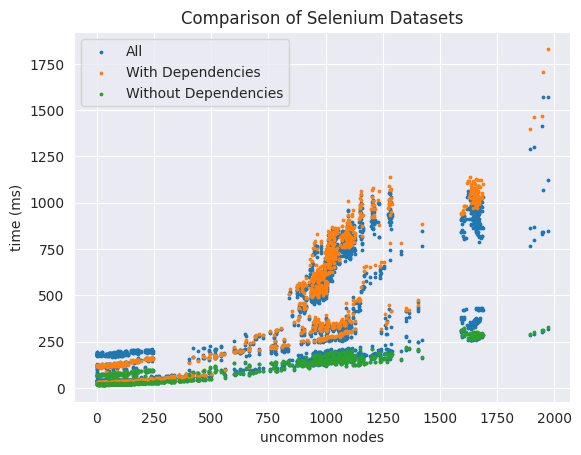

In [43]:
# Create a scatter plot for all metrics
plt.scatter(df['uncommon_nodes'], df['avg_time'], label='All', s=3)
plt.scatter(df_with['uncommon_nodes'], df_with['avg_time'], label='With Dependencies', s=3)
plt.scatter(df_without['uncommon_nodes'], df_without['avg_time'], label='Without Dependencies', s=3)

# Customize the plot
plt.xlabel('uncommon nodes')
plt.ylabel('time (ms)')
plt.title('Comparison of Selenium Datasets')
plt.legend()

# Display the plot
plt.show()

<Axes: xlabel='common nodes', ylabel='time (ms)'>

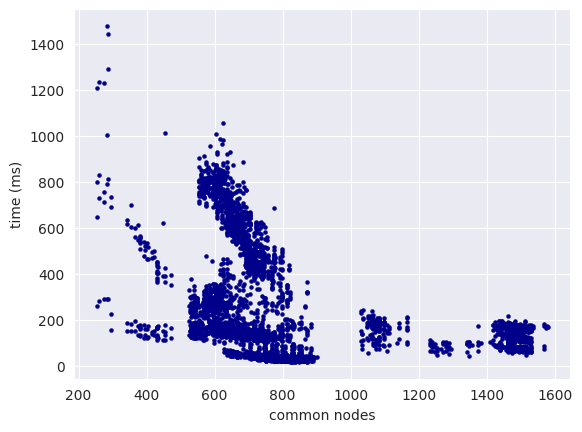

In [110]:
df.plot.scatter(x='generalization_nodes', y='avg_time', c='DarkBlue', s=5, ylabel='time (ms)', xlabel='common nodes')

<Axes: xlabel='edges', ylabel='time (ms)'>

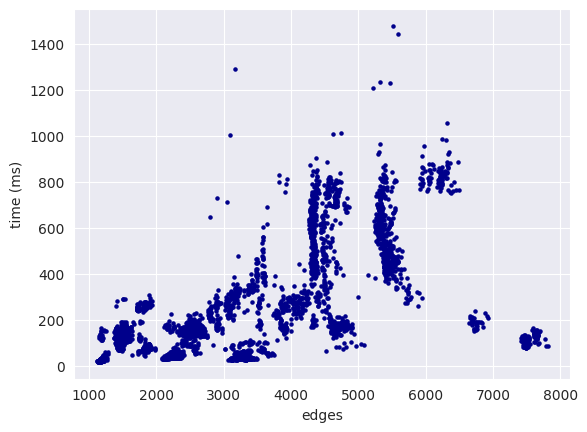

In [112]:
df.plot.scatter(x='edges', y='avg_time', c='DarkBlue', s=5, ylabel='time (ms)', xlabel='edges')

<Axes: xlabel='common edges', ylabel='time (ms)'>

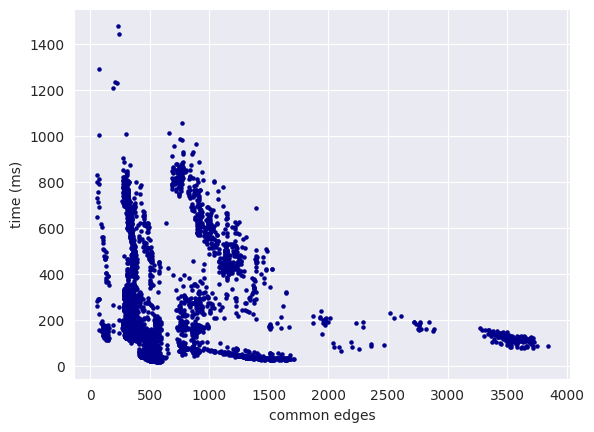

In [114]:
df.plot.scatter(x='generalization_edges', y='avg_time', c='DarkBlue', s=5, ylabel='time (ms)', xlabel='common edges')

<Axes: xlabel='uncommon edges', ylabel='time (ms)'>

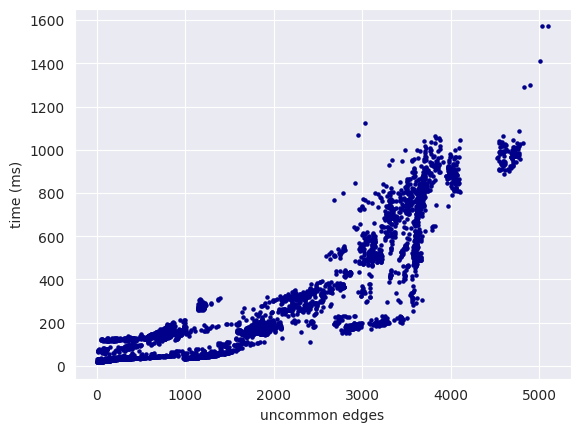

In [53]:
df.plot.scatter(x='uncommon_edges', y='avg_time', c='DarkBlue', s=5, ylabel='time (ms)', xlabel='uncommon edges')

<Axes: xlabel='log(uncommon edges)', ylabel='log(time (ms))'>

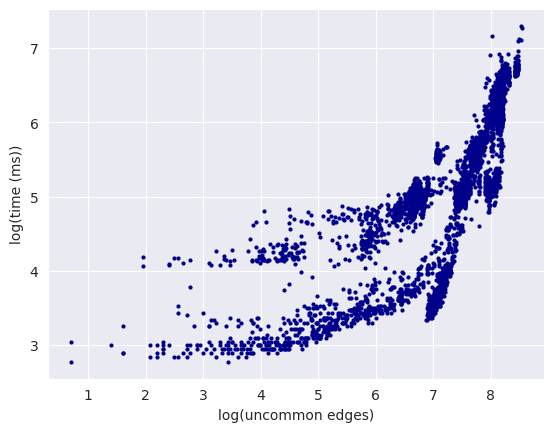

In [117]:
df.plot.scatter(x='log_uncommon_edges', y='log_time', c='DarkBlue', s=4, ylabel='log(time (ms))', xlabel='log(uncommon edges)')

<Axes: xlabel='log(uncommon nodes)', ylabel='log(time (ms))'>

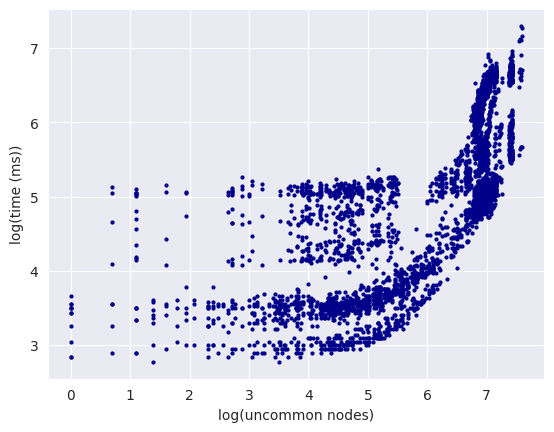

In [118]:
df.plot.scatter(x='log_uncommon_nodes', y='log_time', c='DarkBlue', s=4, ylabel='log(time (ms))', xlabel='log(uncommon nodes)')

<Axes: xlabel='log(nodes)', ylabel='log(time (ms))'>

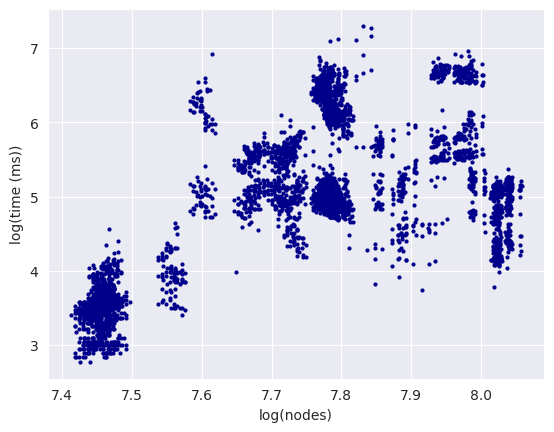

In [119]:
df.plot.scatter(x='log_nodes', y='log_time', c='DarkBlue', s=4, ylabel='log(time (ms))', xlabel='log(nodes)')

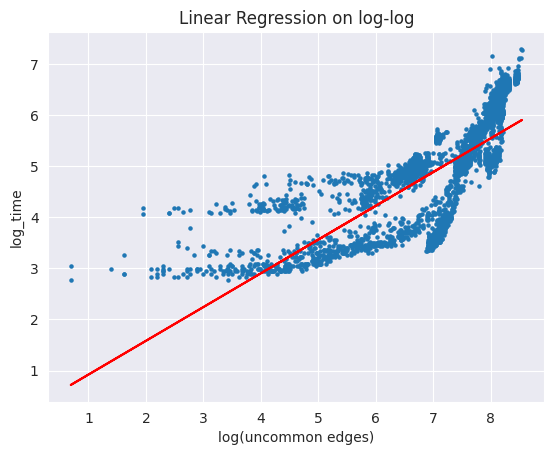

(array([[0.66120729]]), array([0.25997117]), 0.5546120322958428)

In [120]:
linear_regression_of(df, 'log_uncommon_edges', 'log_time', x_label='log(uncommon edges)', y_label='log_time', title='Linear Regression on log-log')

<Axes: xlabel='nodes * edges', ylabel='time (ms)'>

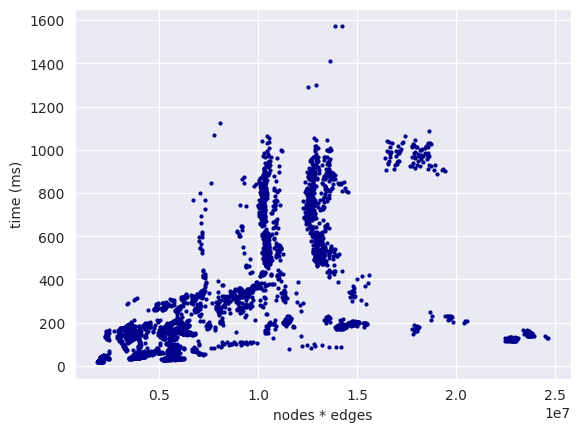

In [54]:
df.plot.scatter(x='nodes_X_edges', y='avg_time', c='DarkBlue', s=4, ylabel='time (ms)', xlabel='nodes * edges')

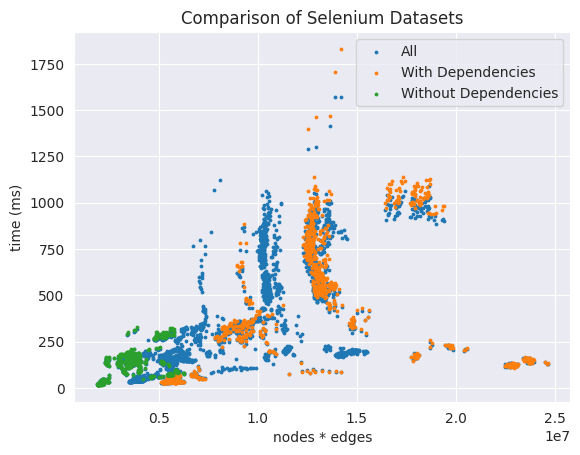

In [55]:
# Create a scatter plot for all metrics
plt.scatter(df['nodes_X_edges'], df['avg_time'], label='All', s=3)
plt.scatter(df_with['nodes_X_edges'], df_with['avg_time'], label='With Dependencies', s=3)
plt.scatter(df_without['nodes_X_edges'], df_without['avg_time'], label='Without Dependencies', s=3)

# Customize the plot
plt.xlabel('nodes * edges')
plt.ylabel('time (ms)')
plt.title('Comparison of Selenium Datasets')
plt.legend()

# Display the plot
plt.show()

<Axes: xlabel='uncommon nodes * uncommon edges', ylabel='time (ms)'>

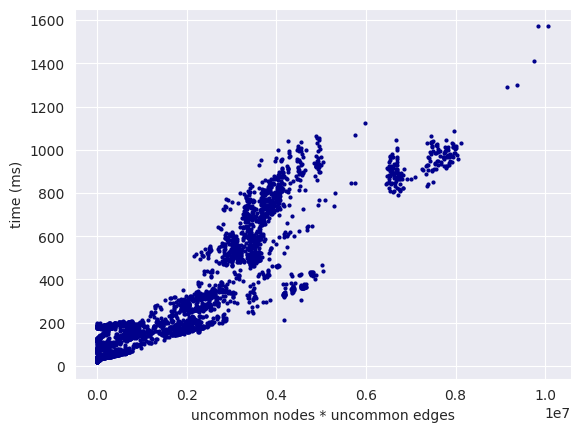

In [60]:
df.plot.scatter(x='uncommon_nodes_X_uncommon_edges', y='avg_time', c='DarkBlue', s=4, ylabel='time (ms)', xlabel='uncommon nodes * uncommon edges')

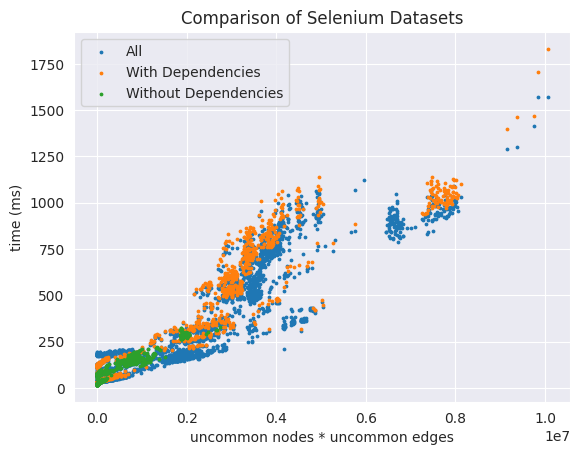

In [57]:
# Create a scatter plot for all metrics
plt.scatter(df['uncommon_nodes_X_uncommon_edges'], df['avg_time'], label='All', s=3)
plt.scatter(df_with['uncommon_nodes_X_uncommon_edges'], df_with['avg_time'], label='With Dependencies', s=3)
plt.scatter(df_without['uncommon_nodes_X_uncommon_edges'], df_without['avg_time'], label='Without Dependencies', s=3)

# Customize the plot
plt.xlabel('uncommon nodes * uncommon edges')
plt.ylabel('time (ms)')
plt.title('Comparison of Selenium Datasets')
plt.legend()

# Display the plot
plt.show()

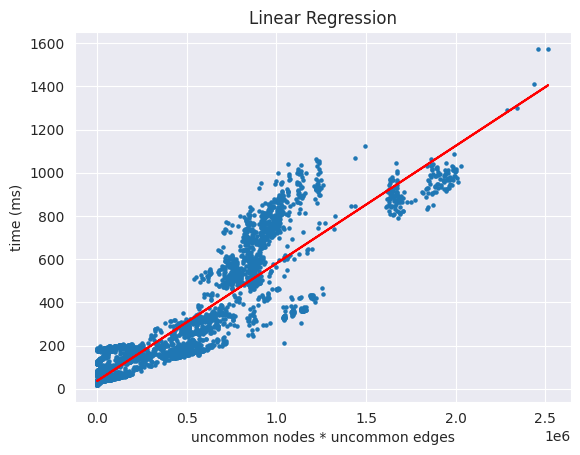

(array([[0.00054406]]), array([36.02711742]), 0.8332324624981371)

In [12]:
linear_regression_of(df[df['uncommon_nodes_X_uncommon_edges'] != 0], 'uncommon_nodes_X_uncommon_edges', 'avg_time', x_label='uncommon nodes * uncommon edges', y_label='time (ms)', title='Linear Regression')

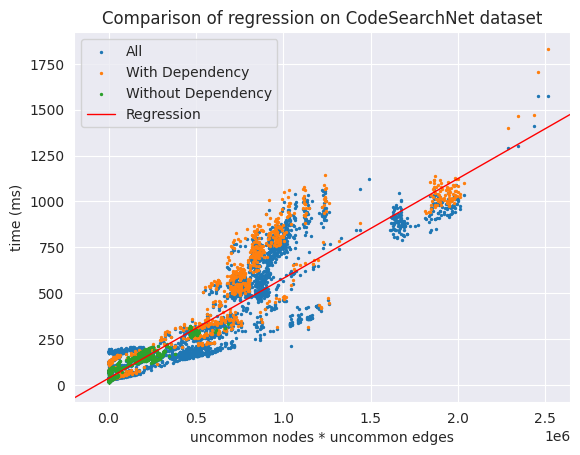

In [16]:
# Create a scatter plot for all metrics
plt.scatter(df['uncommon_nodes_X_uncommon_edges'], df['avg_time'], label='All', s=2)
plt.scatter(df_with['uncommon_nodes_X_uncommon_edges'], df_with['avg_time'], label='With Dependency', s=2)
plt.scatter(df_without['uncommon_nodes_X_uncommon_edges'], df_without['avg_time'], label='Without Dependency', s=2)
plt.axline((0, 36.02711742), (-36.02711742/0.00054406, 0), linewidth=1, color='r', label='Regression')

# Customize the plot
plt.xlabel('uncommon nodes * uncommon edges')
plt.ylabel('time (ms)')
plt.title('Comparison of regression on CodeSearchNet dataset')
plt.legend()

# Display the plot
plt.show()

In [66]:
margin = 350
df1 = df[df['uncommon_nodes'] > margin]
df2 = df[df['uncommon_nodes'] <= margin]

<Axes: xlabel='uncommon nodes * uncommon edges', ylabel='time (ms)'>

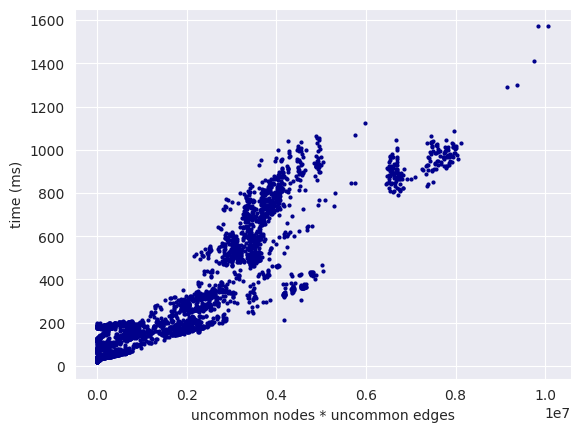

In [67]:
df.plot.scatter(x='uncommon_nodes_X_uncommon_edges', y='avg_time', c='DarkBlue', s=4, ylabel='time (ms)', xlabel='uncommon nodes * uncommon edges')

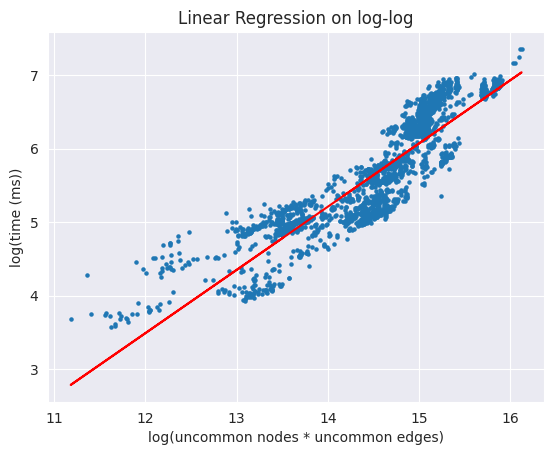

(array([[0.8617569]]), array([-6.85379404]), 0.7798307484439815)

In [69]:
linear_regression_of(df1[df1['uncommon_nodes_X_uncommon_edges'] != 0], 'log_uncommon_nodes_X_uncommon_edges', 'log_avg_time', x_label='log(uncommon nodes * uncommon edges)', y_label='log(time (ms))', title='Linear Regression on log-log')

<Axes: xlabel='nodes', ylabel='time (ms)'>

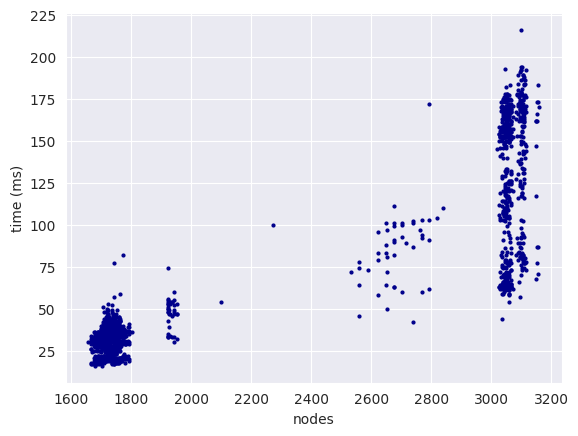

In [128]:
df2.plot.scatter(x='nodes', y='avg_time', c='DarkBlue', s=4, ylabel='time (ms)', xlabel='nodes')

<Axes: xlabel='edges', ylabel='time (ms)'>

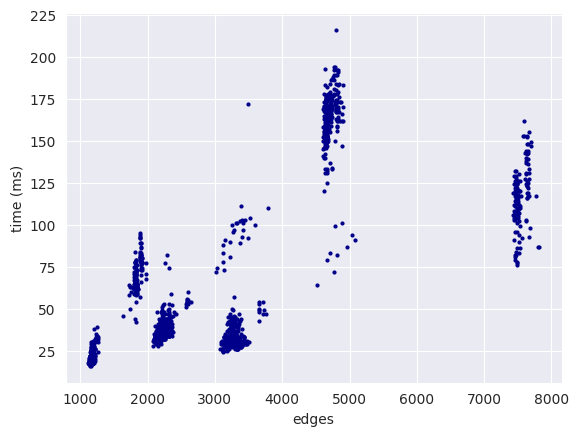

In [129]:
df2.plot.scatter(x='edges', y='avg_time', c='DarkBlue', s=4, ylabel='time (ms)', xlabel='edges')

<Axes: xlabel='nodes * edges', ylabel='time (ms)'>

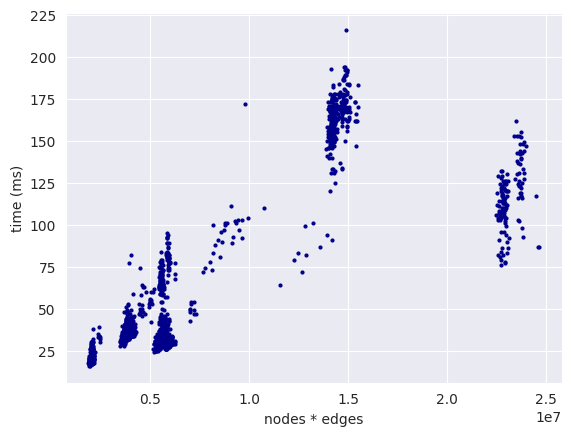

In [130]:
df2.plot.scatter(x='nodes_X_edges', y='avg_time', c='DarkBlue', s=4, ylabel='time (ms)', xlabel='nodes * edges')

<Axes: xlabel='nodes', ylabel='time (ms)'>

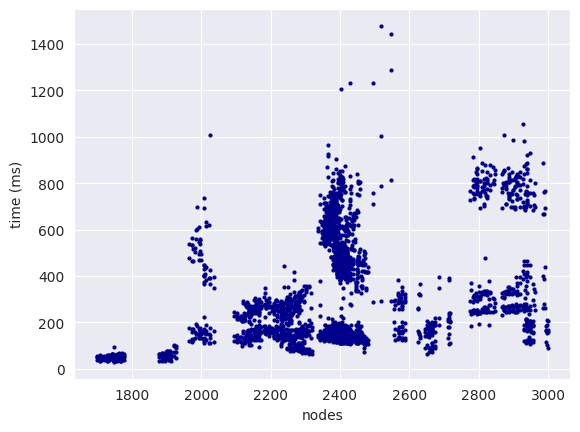

In [132]:
df1.plot.scatter(x='nodes', y='avg_time', c='DarkBlue', s=4, ylabel='time (ms)', xlabel='nodes')

<Axes: xlabel='nodesXedges', ylabel='time (ms)'>

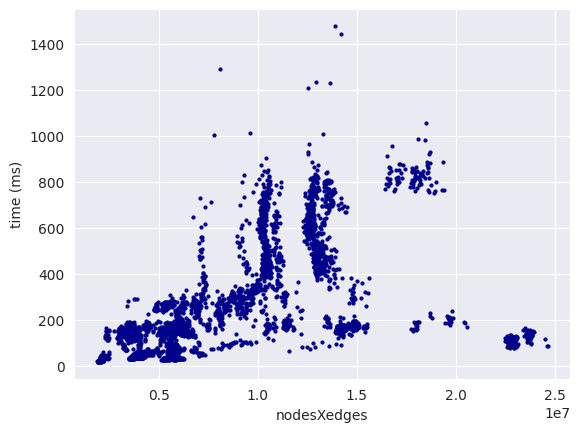

In [133]:
df.plot.scatter(x='nodes_X_edges', y='avg_time', c='DarkBlue', s=4, ylabel='time (ms)', xlabel='nodes_X_edges')

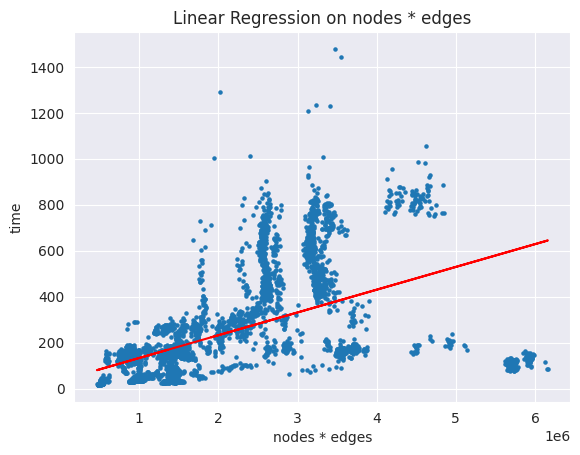

(array([[9.90705935e-05]]), array([34.08023828]), 0.2925285151772288)

In [198]:
linear_regression_of(df, 'nodes_X_edges', 'avg_time', x_label='nodes * edges', y_label='avg_time', title='Linear Regression on nodes * edges')

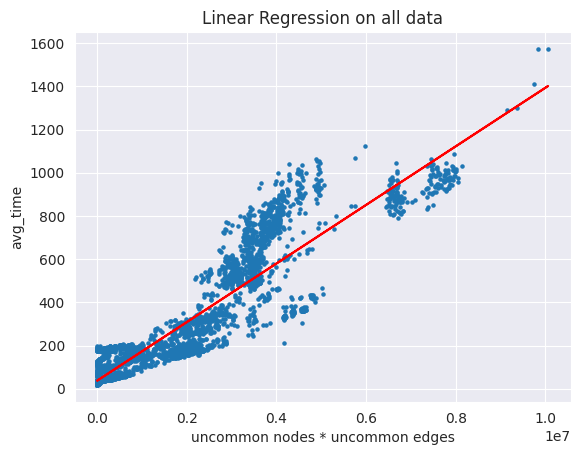

(array([[0.00013556]]), array([37.671896]), 0.8326266496700414)

In [180]:
linear_regression_of(df, 'uncommon_nodes_X_uncommon_edges', 'avg_time', x_label='uncommon nodes * uncommon edges', y_label='avg_time', title='Linear Regression on all data')

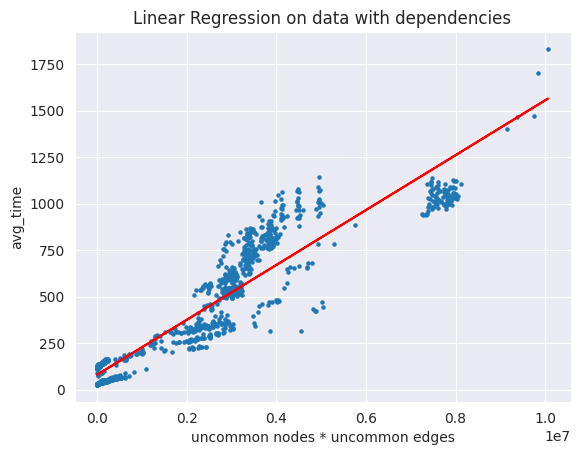

(array([[0.00014749]]), array([80.57824171]), 0.8691130000333376)

In [113]:
linear_regression_of(df_with, 'uncommon_nodes_X_uncommon_edges', 'avg_time', x_label='uncommon nodes * uncommon edges', y_label='avg_time', title='Linear Regression on data with dependencies')

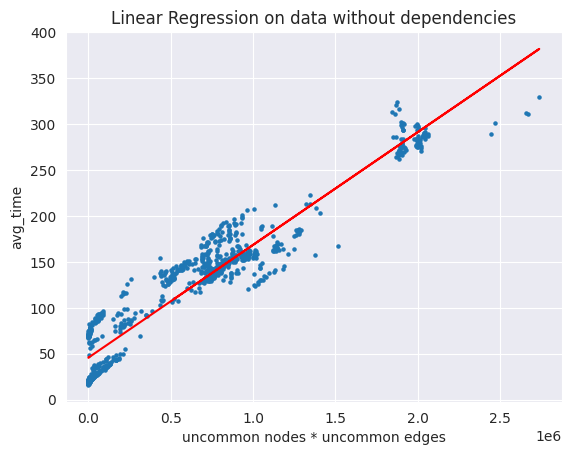

(array([[0.00012282]]), array([45.73277054]), 0.9069966031756571)

In [111]:
linear_regression_of(df_without, 'uncommon_nodes_X_uncommon_edges', 'avg_time', x_label='uncommon nodes * uncommon edges', y_label='avg_time', title='Linear Regression on data without dependencies')

In [115]:
df.describe()['uncommon_nodes'] / df.describe()['nodes']

count    1.000000
mean     0.307978
std      1.161723
min      0.000000
25%      0.083247
50%      0.396472
75%      0.426038
max      0.624051
dtype: float64

In [116]:
df.describe()['uncommon_edges'] / df.describe()['edges']

count    1.000000
mean     0.564294
std      0.789265
min      0.001787
25%      0.375533
50%      0.612927
75%      0.660344
max      0.652764
dtype: float64

<Axes: xlabel='nodes * edges', ylabel='time (ms)'>

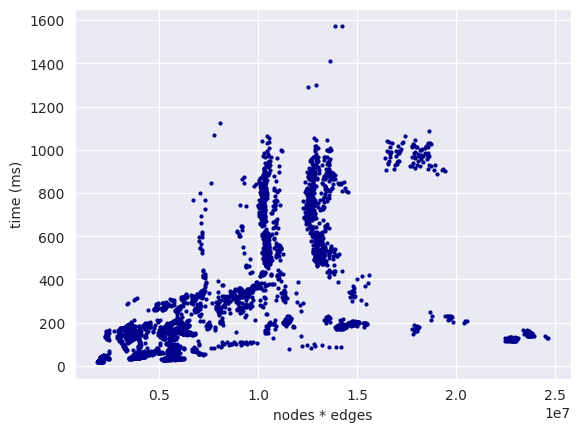

In [74]:
df.plot.scatter(x='nodes_X_edges', y='avg_time', c='DarkBlue', s=4, ylabel='time (ms)', xlabel='nodes * edges')

In [104]:
import math
import re

patternV2 = re.compile(r'(^2.*txtvs)|(vs2.*txt$)')
patternV3 = re.compile(r'(^3.*txtvs)|(vs3.*txt$)')
patternV4 = re.compile(r'(^4.*txtvs)|(vs4.*txt$)')

df['Group'] = df['name'].apply(lambda x:
                               '2vs3' if patternV2.search(x) and patternV3.search(x) else (
                                   '2vs4' if patternV2.search(x) and patternV4.search(x) else (
                                       '3vs3' if patternV3.search(x) and patternV3.search(x) else (
                                           '3vs4' if patternV3.search(x) and patternV4.search(x) else 'Other'
                               ))))
df['nodes_differences'] = (df['g1_nodes'] - df['g2_nodes']).abs()
df['edges_differences'] = (df['g1_edges'] - df['g2_edges']).abs()

In [92]:
df[(df['nodes_X_edges'] > 10_000_000) & (df['nodes_X_edges'] < 12_000_000)]

,name,Group
1,1.0.11-all.txtvs2.0.0-all.txt,Other
113,2.0.0-all.txtvs4.0.0-alpha-3-all.txt,2vs4
154,2.0.0.txtvs3.150.0-all.txt,2vs3
204,2.10.0-all.txtvs4.0.0-alpha-3-all.txt,2vs4
206,2.10.0-all.txtvs4.0.0.txt,2vs4
...,...,...
4683,4.9.1-all.txtvs3.9.0.txt,3vs3
4685,4.9.1-all.txtvs3.9.1.txt,3vs3
4688,4.9.1-all.txtvs4.0.0-alpha-3.txt,Other
4691,4.9.1-all.txtvs4.10.txt,Other


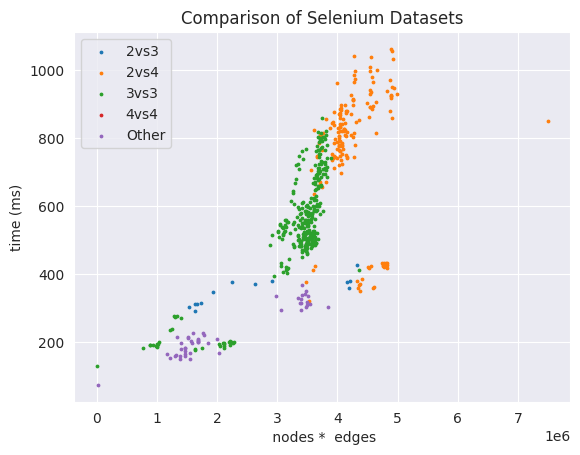

In [107]:
goal_df = df[(df['nodes_X_edges'] > 10_000_000) & (df['nodes_X_edges'] < 12_000_000)]

# Create a scatter plot for all metrics
for label in ['2vs3', '2vs4', '3vs3', '4vs4', 'Other']:
    plt_df = goal_df[goal_df['Group'] == label]
    plt.scatter(plt_df['uncommon_nodes_X_uncommon_edges'], plt_df['avg_time'], label=label, s=3)

# Customize the plot
plt.xlabel(' nodes *  edges')
plt.ylabel('time (ms)')
plt.title('Comparison of Selenium Datasets')
plt.legend()

# Display the plot
plt.show()

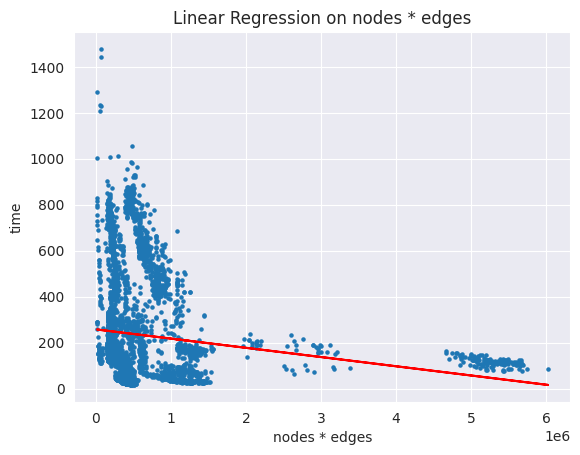

(array([[-4.01420064e-05]]), array([257.44101629]), 0.025678040241625122)

In [175]:
linear_regression_of(df, 'common_nodes_X_common_edges', 'avg_time', x_label='nodes * edges', y_label='avg_time', title='Linear Regression on nodes * edges')

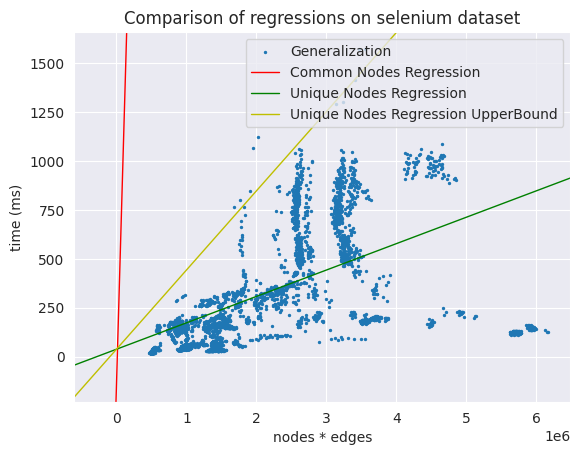

In [121]:
# Create a scatter plot for all metrics
plt.scatter(df['nodes_X_edges']/4, df['avg_time'], label='Generalization', s=2)
plt.axline((0, -144.84), (144.84/0.0124, 0), linewidth=1, color='r', label='Common Nodes Regression')
plt.axline((0, 37.67), (-37.67/0.000135, 0), linewidth=1, color='g', label='Unique Nodes Regression')
plt.axline((0, 37.67), (-37.67/(0.000135 * 3), 0), linewidth=1, color='y', label='Unique Nodes Regression UpperBound')

# Customize the plot
plt.xlabel('nodes * edges')
plt.ylabel('time (ms)')
plt.title('Comparison of regressions on selenium dataset')
plt.legend()

# Display the plot
plt.show()

In [20]:
df.describe()[['nodes', 'edges', 'uncommon_nodes_X_uncommon_edges']]

,nodes,edges,uncommon_nodes_X_uncommon_edges
count,4753.000000,4753.000000,4.753000e+03
mean,1166.224490,1629.214286,4.160682e+05
std,218.987951,793.955233,4.470357e+05
min,828.000000,559.500000,0.000000e+00
25%,961.000000,1054.500000,3.595500e+04
50%,1190.500000,1377.000000,2.341305e+05
75%,1240.500000,2240.500000,6.781308e+05
max,1580.000000,3908.000000,2.515286e+06


<Axes: ylabel='Frequency'>

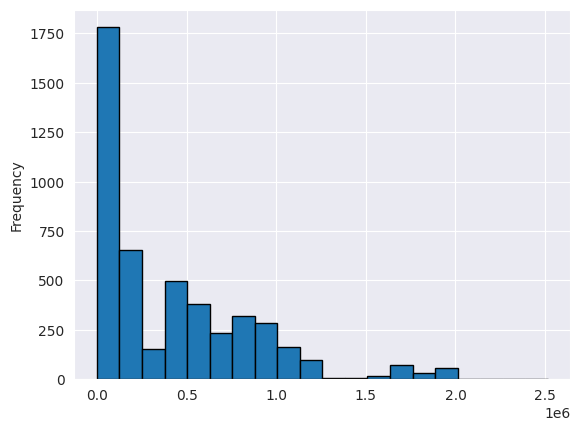

In [21]:
df['uncommon_nodes_X_uncommon_edges'].plot(kind='hist', edgecolor='black', bins=20)

## Nodes

In [22]:
nodes_avg = 1166.22
nodes_std_dev = 219
edges_avg = 1629.21
edges_std_dev = 794
num_reps = 1000
num_simulations = 1000

In [71]:
def choose(n, k):
    numerator = 1
    denominator = 1
    for i in reversed(range(n - k + 1, n + 1)):
        numerator *= i
    for i in reversed(range(1, k + 1)):
        denominator *= i
    return numerator / denominator

def calc_edges(n):
    n = int(n)
    rand = random.random()
    if rand < 1:
        edge = random.randint(n, int(choose(n, 2) / 100))
    else:
        rand = random.random()
        if  rand < 1/3:
            edge = 0.51485643 * n - 142.32773687
        elif rand < 2/3:
            edge = 1.77 * n - 436.14
        elif rand < 5/6:
            edge = 1.18 * n + 600
        else:
            edge = 3.23 * n - 1171
        if edge < 0:
            edge = 0
    return edge

In [72]:
sample_nodes = np.random.normal(nodes_avg, nodes_std_dev, num_reps).round(2)
sample_nodes = sample_nodes[sample_nodes > 0]
num_reps = sample_nodes.size
sample_df = pd.DataFrame(index=range(num_reps), data={'nodes': sample_nodes})
sample_df['edges'] = sample_df['nodes'].apply(calc_edges)
sample_df

,nodes,edges
0,1300.06,3022
1,1156.21,2438
2,1025.88,1840
3,1393.27,2765
4,1358.88,6131
...,...,...
995,1055.94,1489
996,1296.46,4764
997,1271.92,6394
998,882.59,3507


<Axes: ylabel='Frequency'>

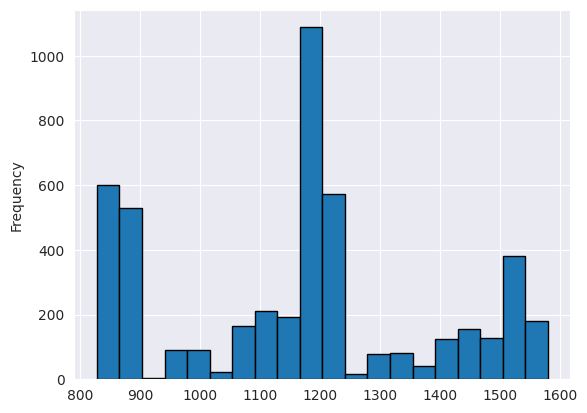

In [74]:
df['nodes'].plot(kind='hist', edgecolor='black', bins=20)

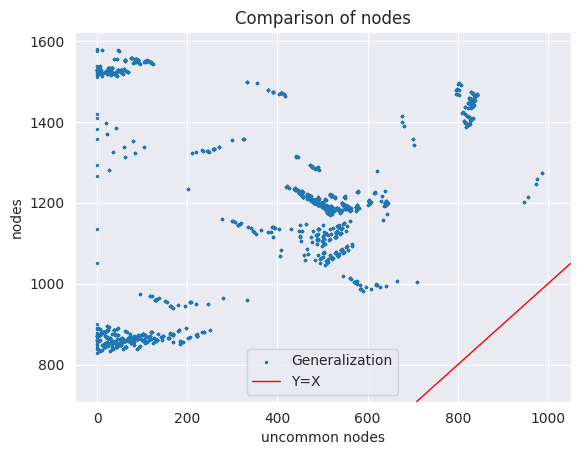

In [27]:
# Create a scatter plot for all metrics
plt.scatter(df['uncommon_nodes'], df['nodes'], label='Generalization', s=2)
plt.axline((750, 750), (1000, 1000), linewidth=1, color='r', label='Y=X')

# Customize the plot
plt.xlabel('uncommon nodes')
plt.ylabel('nodes')
plt.title('Comparison of nodes')
plt.legend()

# Display the plot
plt.show()

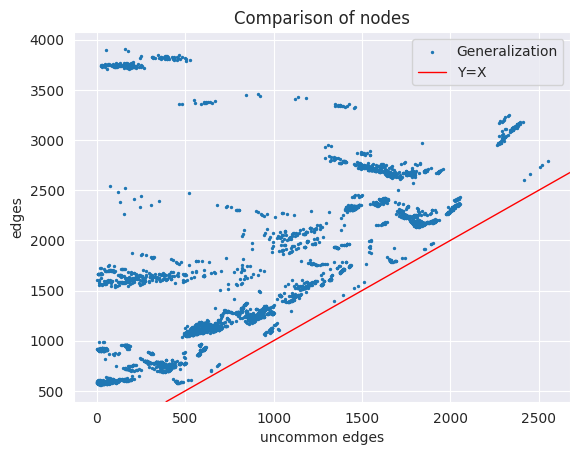

In [28]:
# Create a scatter plot for all metrics
plt.scatter(df['uncommon_edges'], df['edges'], label='Generalization', s=2)
plt.axline((1000, 1000), (2000, 2000), linewidth=1, color='r', label='Y=X')

# Customize the plot
plt.xlabel('uncommon edges')
plt.ylabel('edges')
plt.title('Comparison of nodes')
plt.legend()

# Display the plot
plt.show()

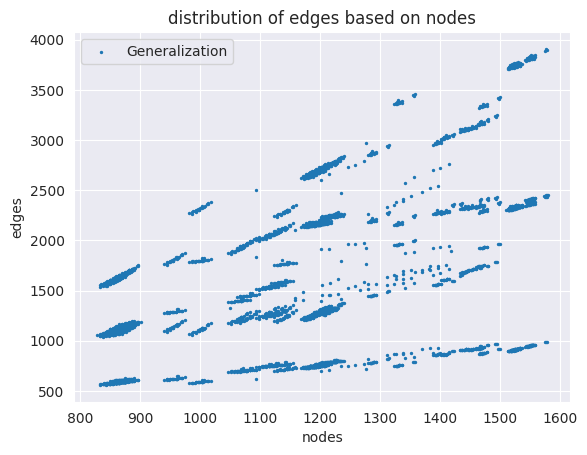

In [29]:
# Create a scatter plot for all metrics
plt.scatter(df['nodes'], df['edges'], label='Generalization', s=2)

# Customize the plot
plt.xlabel('nodes')
plt.ylabel('edges')
plt.title('distribution of edges based on nodes')
plt.legend()

# Display the plot
plt.show()

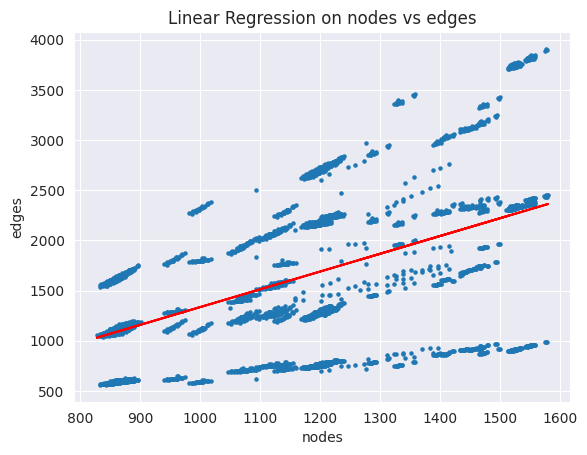

(array([[1.7709751]]), array([-436.1402425]), 0.2386015805788686)

In [30]:
linear_regression_of(df, 'nodes', 'edges', x_label='nodes', y_label='edges', title='Linear Regression on nodes vs edges')

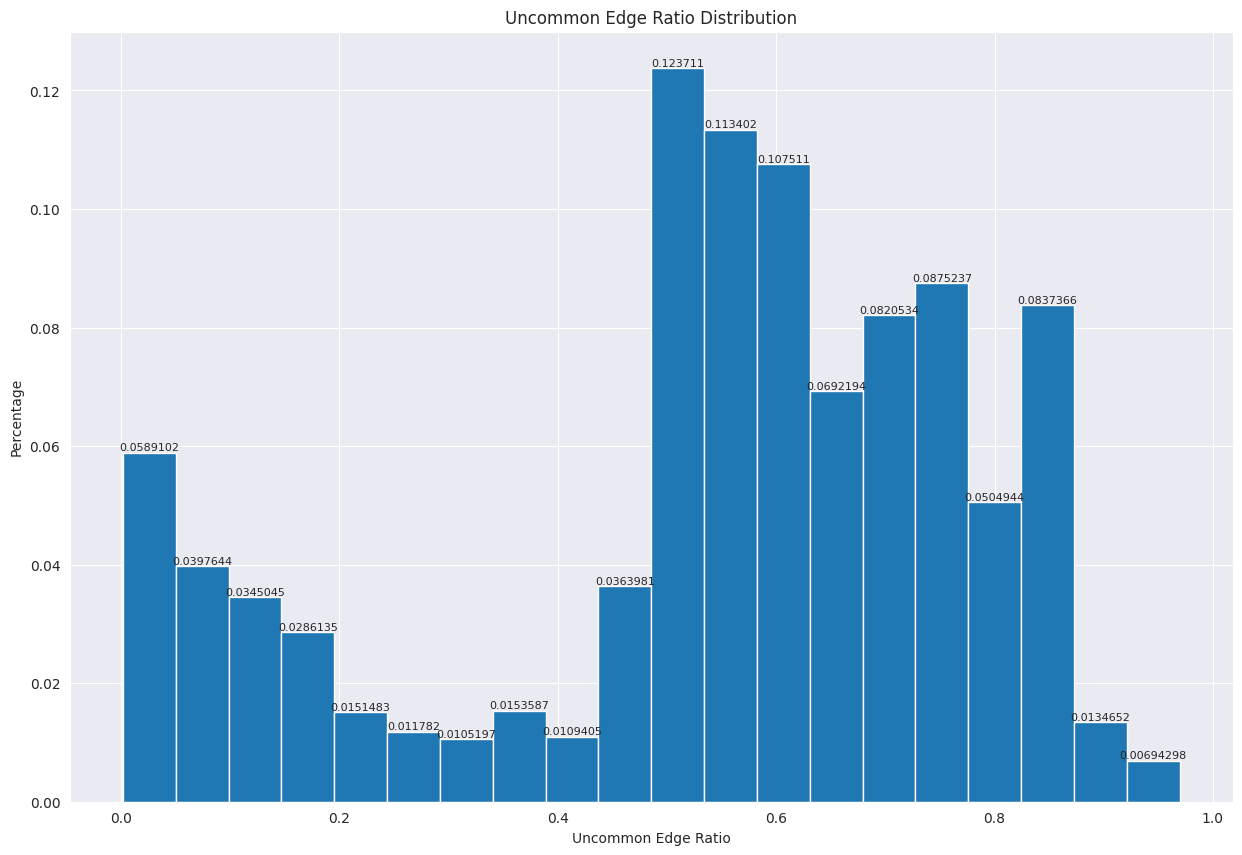

In [32]:
plt.figure(figsize=(15, 10))
values, bins, bars = plt.hist(df['uncommon_edges']/df['edges'], edgecolor='white', bins=20, weights=np.ones(len(df)) / len(df))
plt.xlabel("Uncommon Edge Ratio")
plt.ylabel("Percentage")
plt.title('Uncommon Edge Ratio Distribution')
plt.bar_label(bars, fontsize=8)
plt.show()

In [36]:
uncommon_edges_ratio_values = [0.05 * i for i in range(20)]
uncommon_edges_ratio_prob = np.array([.059, .039, .034, .028, .015, .012, .010, .015, .01, .036, .124, .113, .107, .069, .082, .087, .05, .84, .013, .007])
uncommon_edges_ratio_prob /= sum(uncommon_edges_ratio_prob)
uncommon_edges_ratio = np.random.choice(uncommon_edges_ratio_values, num_reps, p=uncommon_edges_ratio_prob)

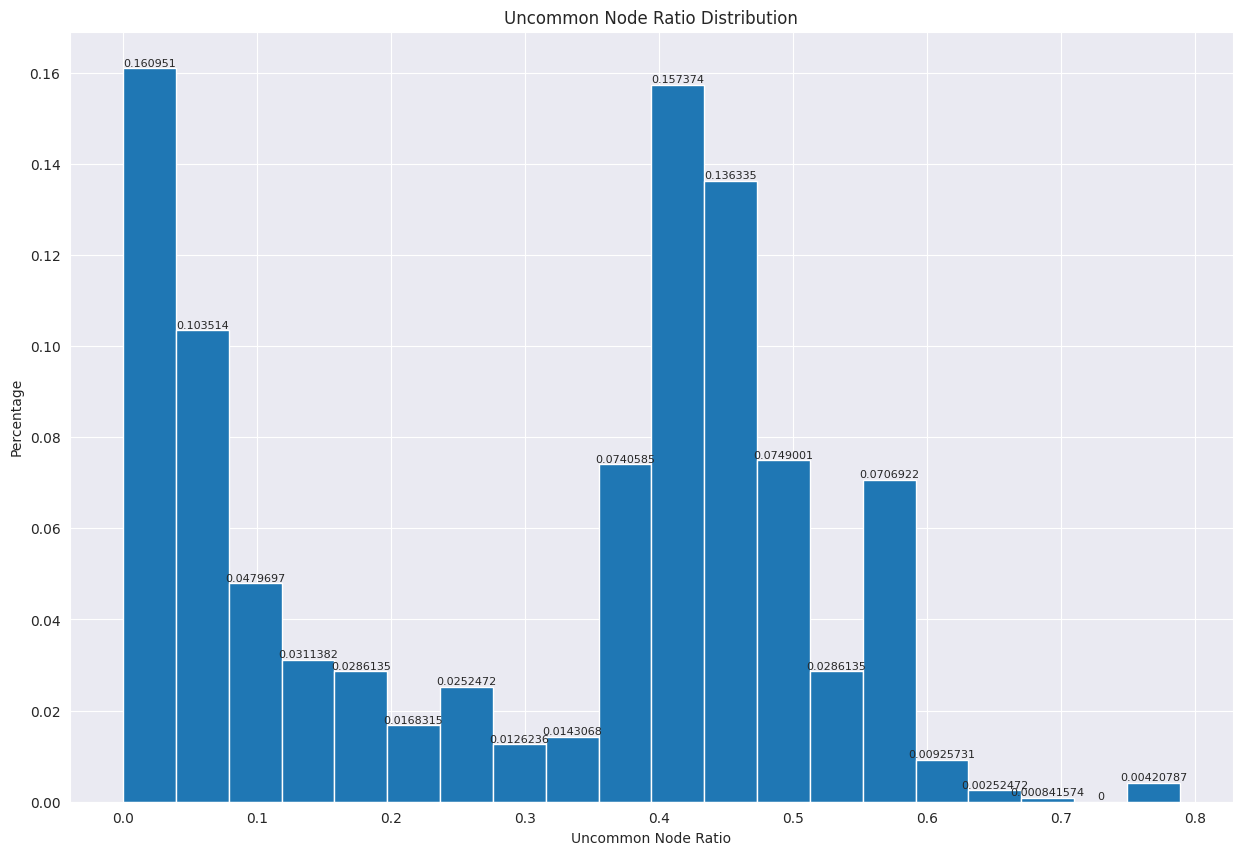

In [53]:
plt.figure(figsize=(15, 10))
values, bins, bars = plt.hist(df['uncommon_nodes']/df['nodes'], edgecolor='white', bins=20, weights=np.ones(len(df)) / len(df))
plt.xlabel("Uncommon Node Ratio")
plt.ylabel("Percentage")
plt.title('Uncommon Node Ratio Distribution')
plt.bar_label(bars, fontsize=8)
plt.show()

In [34]:
uncommon_nodes_ratio_values = [0.05 * i for i in range(20)]
uncommon_nodes_ratio_prob = np.array([.161, .103, .048, .031, .028, .016, .025, .012, .014, .074, .157, .136, .075, .028, .07, .009, .0025, .00084, .0000001, .004])
uncommon_nodes_ratio_prob /= sum(uncommon_nodes_ratio_prob)
uncommon_nodes_ratio = np.random.choice(uncommon_nodes_ratio_values, num_reps, p=uncommon_nodes_ratio_prob)

In [77]:
sample_df['uncommon_nodes'] = uncommon_nodes_ratio * sample_df['nodes']
sample_df['uncommon_edges'] = uncommon_edges_ratio * sample_df['edges']
sample_df['nodes_X_edges'] = sample_df['nodes'] * sample_df['edges']
sample_df['uncommon_nodes_X_uncommon_edges'] = sample_df['uncommon_nodes'] * sample_df['uncommon_edges']
sample_df['time'] = sample_df['uncommon_nodes_X_uncommon_edges'] * 0.00013556 + 37.671896
sample_df

,nodes,edges,uncommon_nodes,uncommon_edges,nodes_X_edges,uncommon_nodes_X_uncommon_edges,time
0,1300.06,3022,910.0420,2266.50,3928781.32,2.062610e+06,317.279334
1,1156.21,2438,346.8630,2072.30,2818839.98,7.188042e+05,135.112993
2,1025.88,1840,564.2340,644.00,1887619.20,3.633667e+05,86.929885
3,1393.27,2765,69.6635,1520.75,3852391.55,1.059408e+05,52.033226
4,1358.88,6131,0.0000,3065.50,8331293.28,0.000000e+00,37.671896
...,...,...,...,...,...,...,...
995,1055.94,1489,105.5940,1265.65,1572294.66,1.336450e+05,55.788818
996,1296.46,4764,907.5220,3096.60,6176335.44,2.810233e+06,418.627031
997,1271.92,6394,0.0000,3836.40,8132656.48,0.000000e+00,37.671896
998,882.59,3507,441.2950,1227.45,3095243.13,5.416675e+05,111.100349


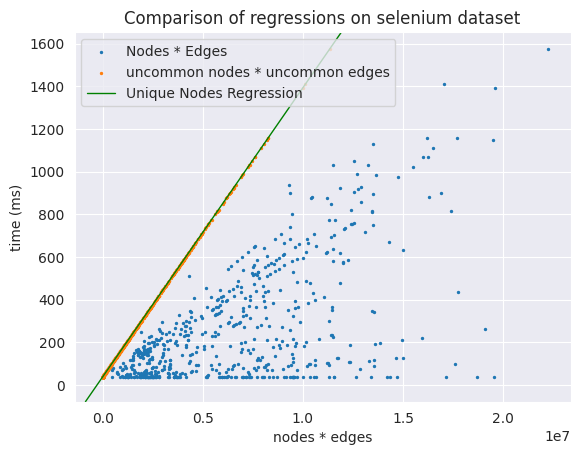

In [189]:
# Create a scatter plot for all metrics

plt.scatter(sample_df['nodes_X_edges'], sample_df['time'], label='Nodes * Edges', s=2)
plt.scatter(sample_df['uncommon_nodes_X_uncommon_edges'], sample_df['time'], label='uncommon nodes * uncommon edges', s=2)
plt.axline((0, 37.6719), (-37.6719/0.00013556, 0), linewidth=1, color='g', label='Unique Nodes Regression')

# Customize the plot
plt.xlabel('nodes * edges')
plt.ylabel('time (ms)')
plt.title('Comparison of regressions on selenium dataset')
plt.legend()

# Display the plot
plt.show()

<Axes: ylabel='Frequency'>

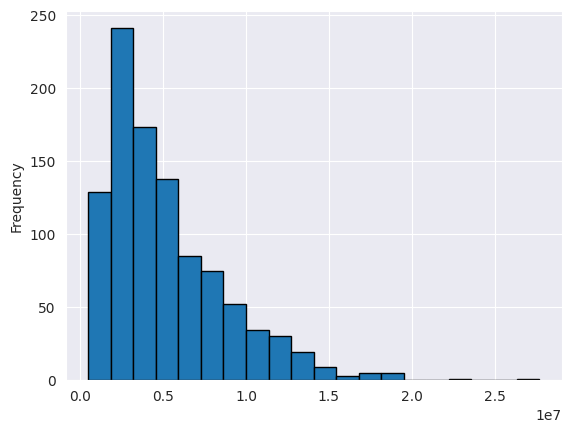

In [78]:
sample_df['nodes_X_edges'].plot(kind='hist', edgecolor='black', bins=20)

ValueError: empty range for randrange() (168, 141, -27)

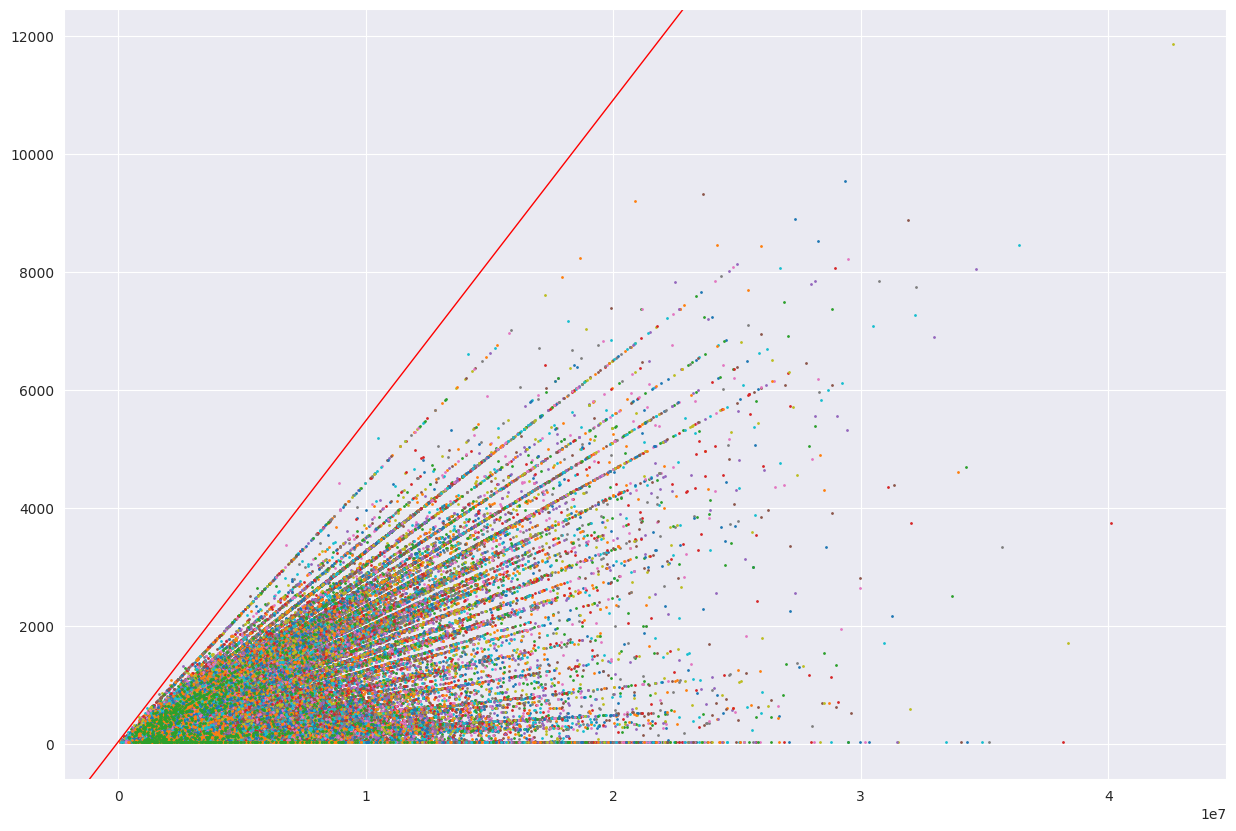

In [80]:
all_stats = []

# Create a scatter plot for all metrics
plt.figure(figsize=(15, 10))
plt.axline((0, 36.02711742), (-36.02711742/0.00054406, 0), linewidth=1, color='r', label='Regression')

# Loop through many simulations
for i in range(num_simulations):
    # Choose random inputs for the sales targets and percent to target
    sample_nodes = np.random.normal(nodes_avg, nodes_std_dev, num_reps).round(2)
    # sample_nodes = sample_nodes[sample_nodes > 0]
    # num_reps = sample_nodes.size
    sample_df = pd.DataFrame(index=range(num_reps), data={'nodes': sample_nodes})
    sample_df['edges'] = sample_df['nodes'].apply(calc_edges)
    uncommon_nodes_ratio = np.random.choice(uncommon_nodes_ratio_values, num_reps, p=uncommon_nodes_ratio_prob)
    uncommon_edges_ratio = np.random.choice(uncommon_edges_ratio_values, num_reps, p=uncommon_edges_ratio_prob)

    sample_df['uncommon_nodes'] = uncommon_nodes_ratio * sample_df['nodes']
    sample_df['uncommon_edges'] = uncommon_edges_ratio * sample_df['edges']
    sample_df['nodes_X_edges'] = sample_df['nodes'] * sample_df['edges']
    sample_df['uncommon_nodes_X_uncommon_edges'] = sample_df['uncommon_nodes'] * sample_df['uncommon_edges']
    sample_df['time'] = sample_df['uncommon_nodes_X_uncommon_edges'] * 0.00054406 + 36.02711742

    plt.scatter(sample_df['nodes_X_edges'], sample_df['time'], s=1)
    # plt.scatter(sample_df['uncommon_nodes_X_uncommon_edges'], sample_df['time'], s=1)

# Customize the plot
plt.xlabel('nodes * edges')
plt.ylabel('time (ms)')
plt.title('Comparison of regressions on selenium dataset')
plt.legend()

# Display the plot
plt.show()